<a href="https://colab.research.google.com/github/miYo-0/Sleep-Efficiency/blob/main/Sleep_Efficiency.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# Importing necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

# _About Dataset_
### The dataset contains information about a group of test subjects and their sleep patterns. Each test subject is identified by a unique "Subject ID" and their age and gender are also recorded. 

### The "Bedtime" and "Wakeup time" features indicate when each subject goes to bed and wakes up each day, and the "Sleep duration" feature records the total amount of time each subject slept in hours. 

### The "Sleep efficiency" feature is a measure of the proportion of time spent in bed that is actually spent asleep. The "REM sleep percentage", "Deep sleep percentage", and "Light sleep percentage" features indicate the amount of time each subject spent in each stage of sleep.

### The "Awakenings" feature records the number of times each subject wakes up during the night. Additionally, the dataset includes information about each subject's caffeine and alcohol consumption in the 24 hours prior to bedtime, their smoking status, and their exercise frequency.

In [3]:
sleep = pd.read_csv('/content/drive/MyDrive/Dataset/Sleep_Efficiency.csv')

In [4]:
sleep.head()


,ID,Age,Gender,Bedtime,Wakeup time,Sleep duration,Sleep efficiency,REM sleep percentage,Deep sleep percentage,Light sleep percentage,Awakenings,Caffeine consumption,Alcohol consumption,Smoking status,Exercise frequency
0,1,65,Female,2021-03-06 01:00:00,2021-03-06 07:00:00,6.0,0.88,18,70,10,0.0,0.0,0.0,Yes,3.0
1,2,69,Male,2021-12-05 02:00:00,2021-12-05 09:00:00,7.0,0.66,24,28,53,3.0,0.0,3.0,Yes,3.0
2,3,40,Female,2021-05-25 21:30:00,2021-05-25 05:30:00,8.0,0.89,20,70,10,1.0,0.0,0.0,No,3.0
3,4,40,Female,2021-11-03 02:30:00,2021-11-03 08:30:00,6.0,0.51,28,25,52,3.0,50.0,5.0,Yes,1.0
4,5,57,Male,2021-03-13 01:00:00,2021-03-13 09:00:00,8.0,0.76,27,55,18,3.0,0.0,3.0,No,3.0


In [5]:
sleep.shape

(452, 15)

In [6]:
# Information on dataframe
sleep.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 452 entries, 0 to 451
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   ID                      452 non-null    int64  
 1   Age                     452 non-null    int64  
 2   Gender                  452 non-null    object 
 3   Bedtime                 452 non-null    object 
 4   Wakeup time             452 non-null    object 
 5   Sleep duration          452 non-null    float64
 6   Sleep efficiency        452 non-null    float64
 7   REM sleep percentage    452 non-null    int64  
 8   Deep sleep percentage   452 non-null    int64  
 9   Light sleep percentage  452 non-null    int64  
 10  Awakenings              432 non-null    float64
 11  Caffeine consumption    427 non-null    float64
 12  Alcohol consumption     436 non-null    float64
 13  Smoking status          452 non-null    object 
 14  Exercise frequency      446 non-null    fl

In [7]:
sleep.describe()

,ID,Age,Sleep duration,Sleep efficiency,REM sleep percentage,Deep sleep percentage,Light sleep percentage,Awakenings,Caffeine consumption,Alcohol consumption,Exercise frequency
count,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,432.000000,427.000000,436.000000,446.000000
mean,226.500000,40.285398,7.465708,0.788916,23.002212,52.960177,24.831858,1.641204,23.653396,1.245413,1.791480
std,130.625419,13.172250,0.866625,0.135237,3.972466,15.561713,15.150774,1.356762,30.202785,1.643336,1.428134
min,1.000000,9.000000,5.000000,0.500000,15.000000,20.000000,7.000000,0.000000,0.000000,0.000000,0.000000
25%,113.750000,29.000000,7.000000,0.697500,20.000000,51.250000,15.000000,1.000000,0.000000,0.000000,0.000000
50%,226.500000,40.000000,7.500000,0.820000,22.000000,60.000000,18.000000,1.000000,25.000000,0.000000,2.000000
75%,339.250000,52.000000,8.000000,0.900000,27.000000,63.000000,27.250000,3.000000,50.000000,2.000000,3.000000
max,452.000000,69.000000,10.000000,0.990000,30.000000,75.000000,56.000000,4.000000,200.000000,5.000000,5.000000


## Exploratory Data Analysis

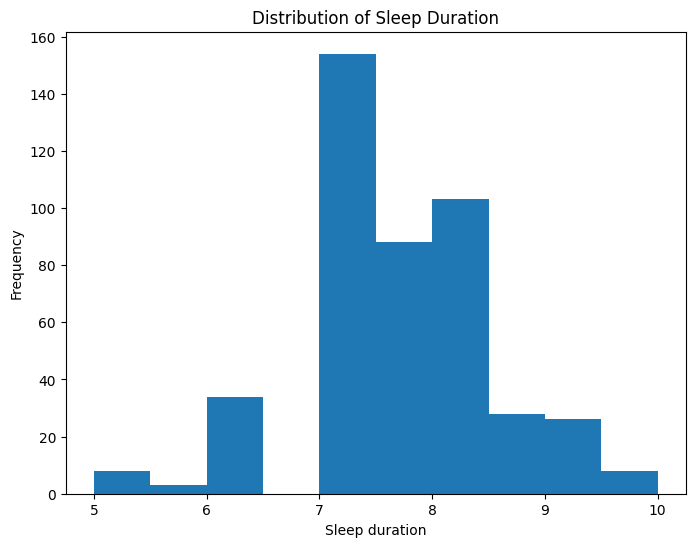

In [8]:
# Creating a histogram of Distribution of Sleep Duration
plt.figure(figsize=(8,6))
plt.hist(sleep["Sleep duration"])
plt.xlabel("Sleep duration")
plt.ylabel("Frequency")
plt.title("Distribution of Sleep Duration");

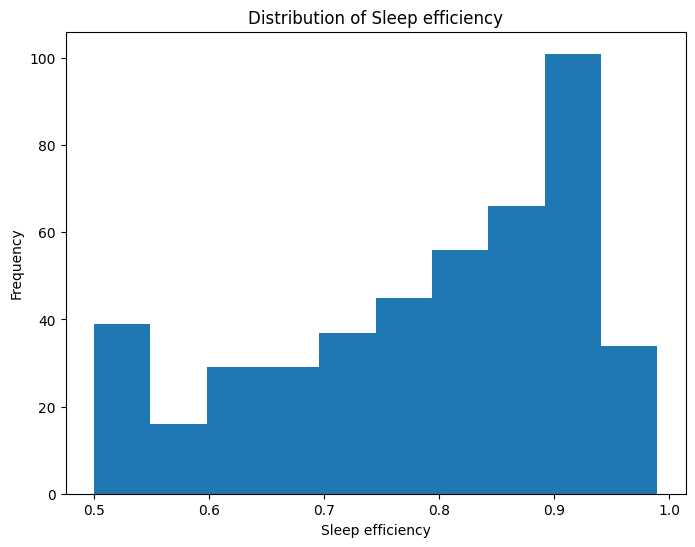

In [9]:
# Creating a histogram of Distribution of Sleep efficiency
plt.figure(figsize=(8,6))
plt.hist(sleep["Sleep efficiency"])
plt.xlabel("Sleep efficiency")
plt.ylabel("Frequency")
plt.title("Distribution of Sleep efficiency");

In [10]:
sleep['REM sleep percentage'] = sleep['REM sleep percentage']/100
sleep['Deep sleep percentage'] = sleep['Deep sleep percentage']/100
sleep['Light sleep percentage'] = sleep['Light sleep percentage']/100

In [11]:
gender_group = sleep.groupby('Gender')['Sleep efficiency', 'REM sleep percentage',
                                       'Deep sleep percentage', 'Light sleep percentage', 'Sleep duration'].mean() 
gender_group

,Sleep efficiency,REM sleep percentage,Deep sleep percentage,Light sleep percentage,Sleep duration
Gender,,,,,
Female,0.787545,0.236205,0.519911,0.255357,7.504464
Male,0.790263,0.223947,0.539123,0.241404,7.427632


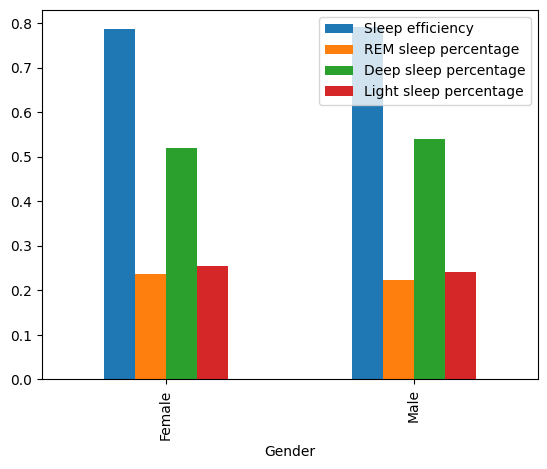

In [12]:
gender_group.drop(columns=['Sleep duration']).plot(kind="bar");

### From the plot above plot, it is clear that the gender of a person has very little impact on the Sleep efficiency and general sleep percentage

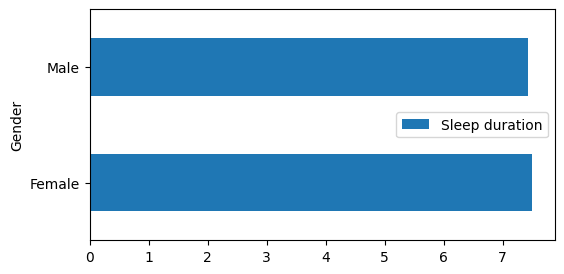

In [13]:
gender_group[['Sleep duration']].plot(kind='barh', figsize=(6,3));

In [14]:
# Sleep duration is also about the same in both males and females.

### Performing Age binning to check distribution of Sleep efficiency among different age groups.

In [15]:
min(sleep['Age']), max(sleep['Age'])

(9, 69)

In [16]:
age_bins = [9, 12, 19, 29, 39, 49, 59, 70]
group_names = ["Child", "Teen", "20+", "30+", "40+", "50+", "60+"]

In [17]:
sleep["age-binned"] = pd.cut(sleep["Age"], age_bins, labels=group_names, include_lowest = True)
sleep[['Age', 'age-binned']].head()

,Age,age-binned
0,65,60+
1,69,60+
2,40,40+
3,40,40+
4,57,50+


In [18]:
age_groups = sleep.groupby('age-binned')['Sleep efficiency', 'Sleep duration'].mean()
age_groups

,Sleep efficiency,Sleep duration
age-binned,,
Child,0.542500,8.375000
Teen,0.719231,7.807692
20+,0.766509,7.415094
30+,0.813474,7.568421
40+,0.807347,7.367347
50+,0.801569,7.392157
60+,0.754706,7.602941


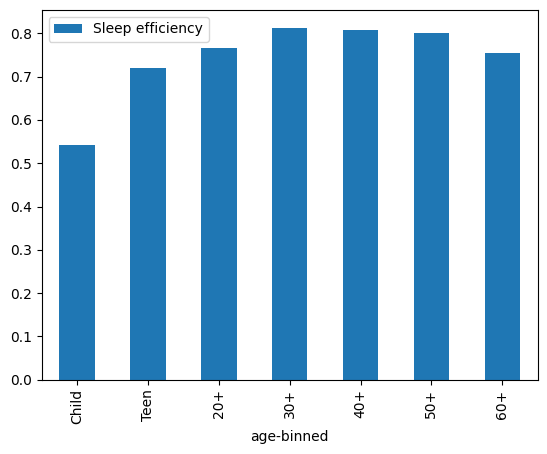

In [19]:
age_groups.plot(kind='bar', y='Sleep efficiency');

### While Sleep efficiency describes the percentage of sleep time actually spent sleeping, the dataset shows that Sleep efficiency increases to over 80% in age bracket of 40+ from around 50% in children before gradually decreasing as age increases further.

### Sleep duration among age groups

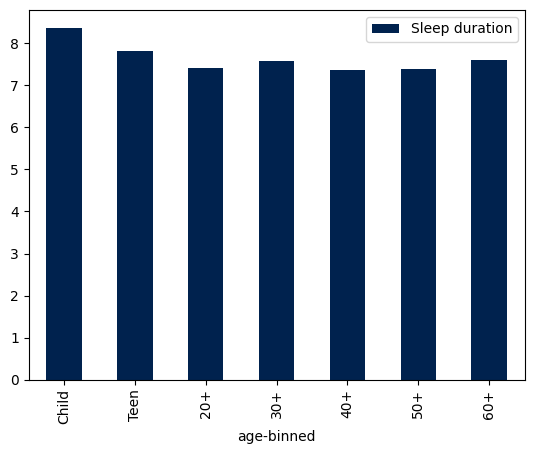

In [20]:
age_groups.plot(kind='bar', y='Sleep duration', colormap='cividis');

### Sleep efficiency among smokers

In [21]:
smoking_group = sleep.groupby('Smoking status')['Sleep efficiency', 'Smoking status'].mean()
smoking_group

,Sleep efficiency
Smoking status,
No,0.822234
Yes,0.728696


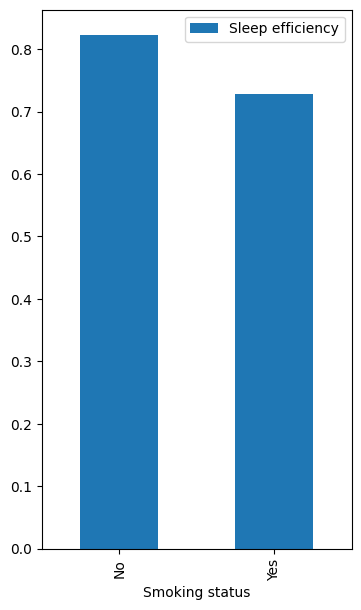

In [22]:
smoking_group.plot(kind='bar', figsize=(4,7));

In [23]:
## It is clear here that Smokers generally have a lower sleep efficiency compared to non-smokers. 

### Effect of Exercise on Sleep efficiency

In [24]:
sleep['Exercise frequency'].value_counts()

3.0    130
0.0    116
1.0     97
2.0     54
4.0     41
5.0      8
Name: Exercise frequency, dtype: int64

In [25]:
exercise_group = sleep.groupby('Exercise frequency')['Exercise frequency', 'Sleep efficiency'].mean()
exercise_group = exercise_group.drop(columns=['Exercise frequency']).reset_index()
exercise_group

,Exercise frequency,Sleep efficiency
0,0.0,0.743879
1,1.0,0.774124
2,2.0,0.810000
3,3.0,0.799154
4,4.0,0.881463
5,5.0,0.851250


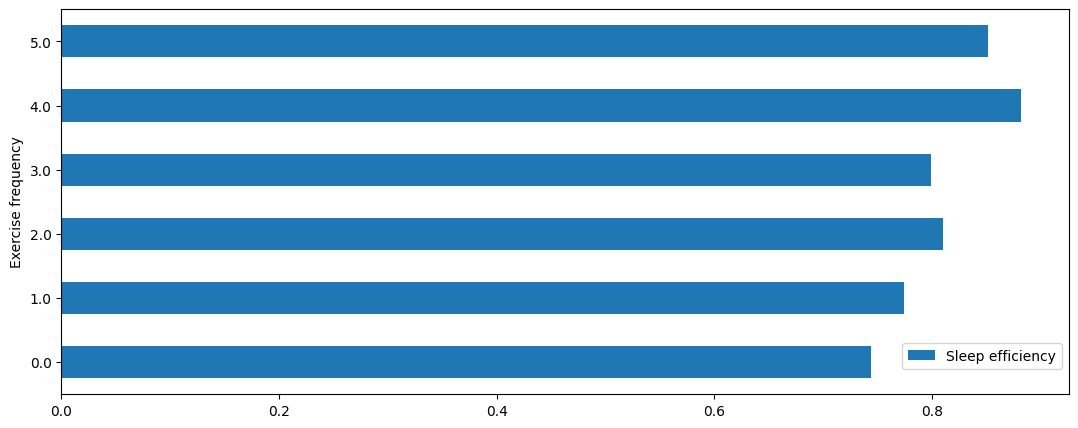

In [26]:
exercise_group.plot(kind='barh', x='Exercise frequency', y='Sleep efficiency', figsize=(13,5)).legend(bbox_to_anchor=(1, 0.15));

### Sleep efficiency is generally higher amongst people with a frequent level of exercising.

## Cleaning dataset

In [27]:
sleep_clean = sleep.drop(columns=['ID', 'Bedtime', 'Wakeup time'])

In [28]:
sleep_clean.dtypes

Age                          int64
Gender                      object
Sleep duration             float64
Sleep efficiency           float64
REM sleep percentage       float64
Deep sleep percentage      float64
Light sleep percentage     float64
Awakenings                 float64
Caffeine consumption       float64
Alcohol consumption        float64
Smoking status              object
Exercise frequency         float64
age-binned                category
dtype: object

In [29]:
sleep_clean['Gender']=sleep_clean['Gender'].astype('category')
sleep_clean['Smoking status']=sleep_clean['Smoking status'].astype('category')

In [30]:
sleep_clean.dtypes

Age                          int64
Gender                    category
Sleep duration             float64
Sleep efficiency           float64
REM sleep percentage       float64
Deep sleep percentage      float64
Light sleep percentage     float64
Awakenings                 float64
Caffeine consumption       float64
Alcohol consumption        float64
Smoking status            category
Exercise frequency         float64
age-binned                category
dtype: object

In [31]:
sleep_clean = pd.get_dummies(sleep_clean, columns = ['Gender', 'Smoking status', 'age-binned'])
sleep_clean.head()

,Age,Sleep duration,Sleep efficiency,REM sleep percentage,Deep sleep percentage,Light sleep percentage,Awakenings,Caffeine consumption,Alcohol consumption,Exercise frequency,...,Gender_Male,Smoking status_No,Smoking status_Yes,age-binned_Child,age-binned_Teen,age-binned_20+,age-binned_30+,age-binned_40+,age-binned_50+,age-binned_60+
0,65,6.0,0.88,0.18,0.70,0.10,0.0,0.0,0.0,3.0,...,0,0,1,0,0,0,0,0,0,1
1,69,7.0,0.66,0.24,0.28,0.53,3.0,0.0,3.0,3.0,...,1,0,1,0,0,0,0,0,0,1
2,40,8.0,0.89,0.20,0.70,0.10,1.0,0.0,0.0,3.0,...,0,1,0,0,0,0,0,1,0,0
3,40,6.0,0.51,0.28,0.25,0.52,3.0,50.0,5.0,1.0,...,0,0,1,0,0,0,0,1,0,0
4,57,8.0,0.76,0.27,0.55,0.18,3.0,0.0,3.0,3.0,...,1,1,0,0,0,0,0,0,1,0


In [32]:
#To check for missing data 
sleep_clean.isna().sum()

Age                        0
Sleep duration             0
Sleep efficiency           0
REM sleep percentage       0
Deep sleep percentage      0
Light sleep percentage     0
Awakenings                20
Caffeine consumption      25
Alcohol consumption       16
Exercise frequency         6
Gender_Female              0
Gender_Male                0
Smoking status_No          0
Smoking status_Yes         0
age-binned_Child           0
age-binned_Teen            0
age-binned_20+             0
age-binned_30+             0
age-binned_40+             0
age-binned_50+             0
age-binned_60+             0
dtype: int64

There are missing data for `Awakenings`, `Caffeine_consumption`, `Alcohol_consumption` and `Exercise_frequency`.

### Since all of these features are either ordinal or descrete, we can assume that the missing datas should have values as zero.

In [33]:
# Replace NaNs with zeros in all columns
sleep_clean.fillna(0, inplace=True)
sleep_clean.isna().sum()

Age                       0
Sleep duration            0
Sleep efficiency          0
REM sleep percentage      0
Deep sleep percentage     0
Light sleep percentage    0
Awakenings                0
Caffeine consumption      0
Alcohol consumption       0
Exercise frequency        0
Gender_Female             0
Gender_Male               0
Smoking status_No         0
Smoking status_Yes        0
age-binned_Child          0
age-binned_Teen           0
age-binned_20+            0
age-binned_30+            0
age-binned_40+            0
age-binned_50+            0
age-binned_60+            0
dtype: int64

### Correlation Heatmap plot

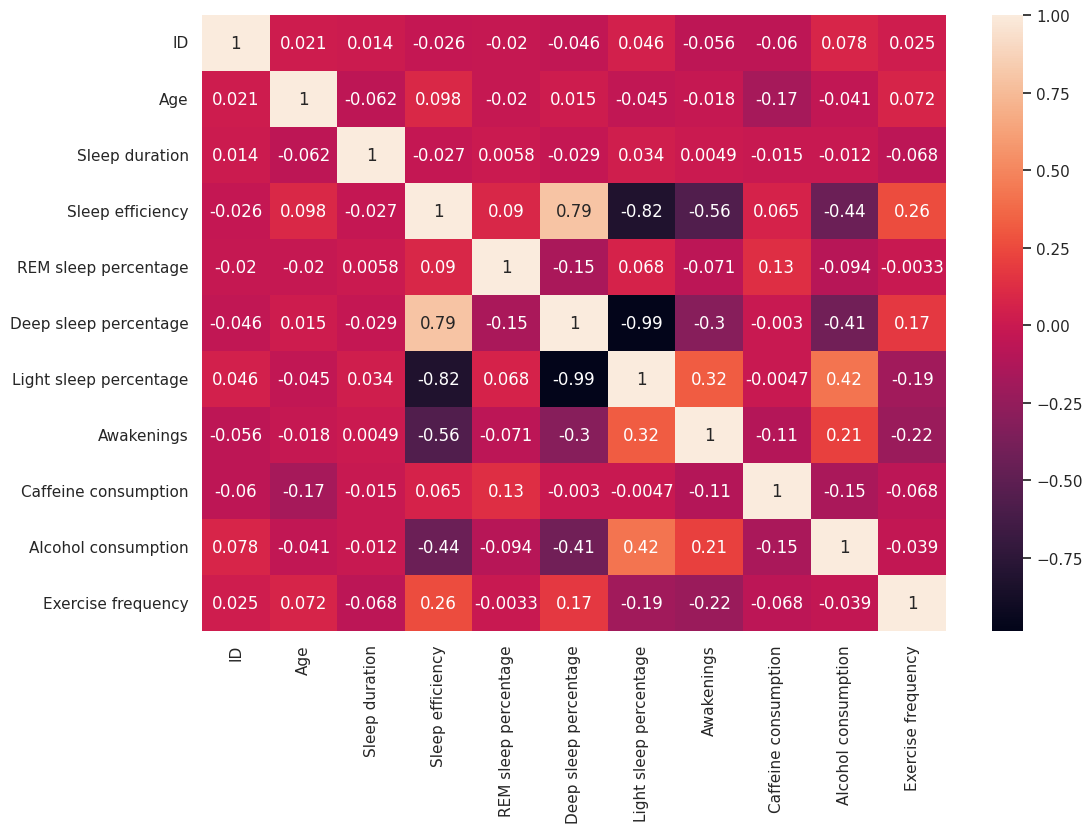

In [34]:
sns.set(rc={'figure.figsize':(12,8)})
sns.heatmap(sleep.corr(), annot=True);

### From the correlation plot, it is observed that Deep sleep percentage has a strong positive correlation with our target feature, Sleep efficiency.

### Also, Light sleep percentage is strongly negatively correlated with Sleep efficiency and in summary says that Sleep efficiency decreases with increase in Light sleep percentage and increases with an increase as well in Deep sleep percentage.

## Checking and Dealing with outliers

Box Plots of the continuous features


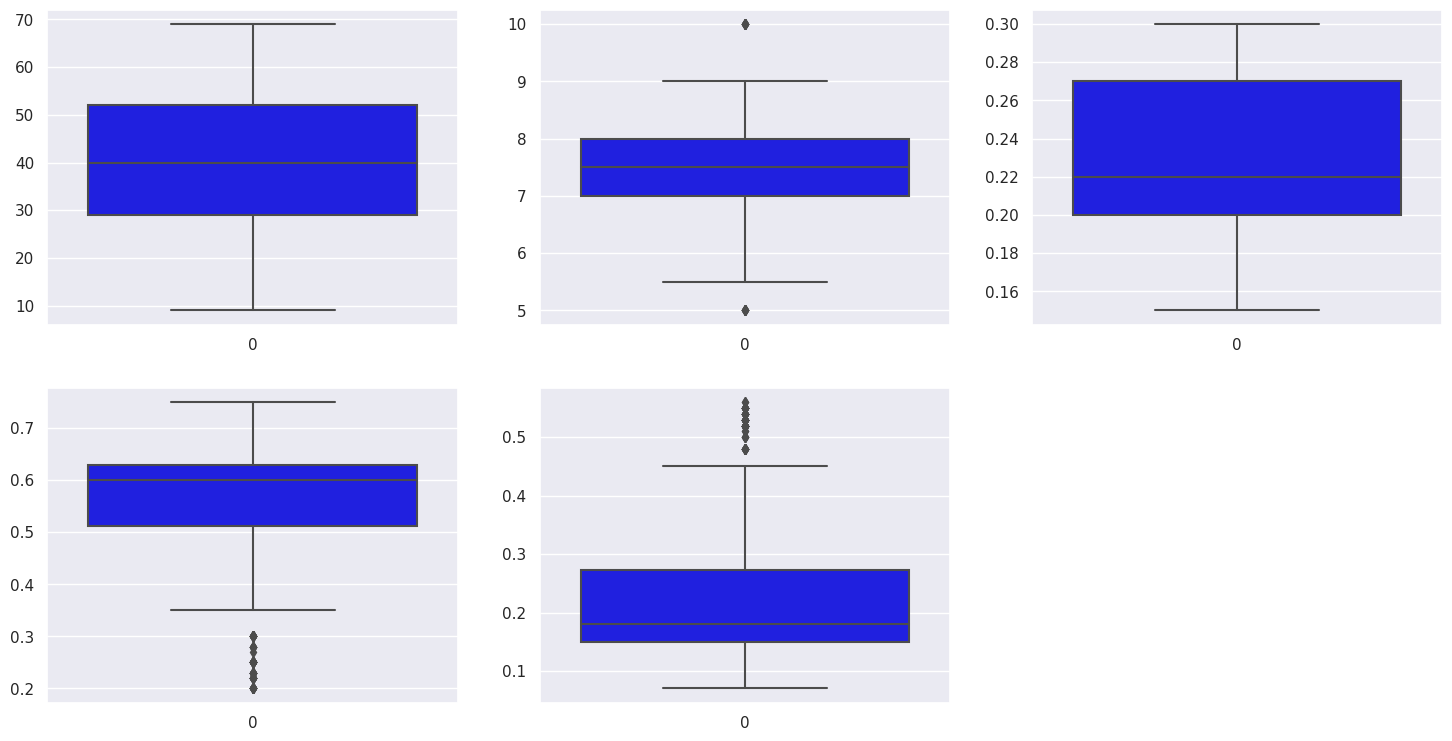

In [35]:
# Next step in our process flow is to check for any outliers present in the continuous attributes/features.
# We can identify with visuals and let us use z score technique.

column_names_=['Age','Sleep duration','REM sleep percentage','Deep sleep percentage','Light sleep percentage']
plt.figure(figsize=(18,9))
for i in range(0,len(column_names_)):
    plt.subplot(2,3,i+1)
    sns.boxplot(sleep_clean[column_names_[i]],color='blue')
print('Box Plots of the continuous features')
plt.show()

In [36]:
# Outliers are present in the columns. We will now check the z score of these columns and remove the outliers. 

from scipy.stats import zscore

outliers = np.abs(zscore(sleep_clean.loc[:,'Age':]))
print(np.shape(np.where(outliers>=3)))

(2, 55)


### Since we have only 55 data points (observations as outliers), we can choose to ignore these as they could represent extreme cases that could be crucial to creating a good model.

## Split the Data

In [37]:
sleep_clean.head()

,Age,Sleep duration,Sleep efficiency,REM sleep percentage,Deep sleep percentage,Light sleep percentage,Awakenings,Caffeine consumption,Alcohol consumption,Exercise frequency,...,Gender_Male,Smoking status_No,Smoking status_Yes,age-binned_Child,age-binned_Teen,age-binned_20+,age-binned_30+,age-binned_40+,age-binned_50+,age-binned_60+
0,65,6.0,0.88,0.18,0.70,0.10,0.0,0.0,0.0,3.0,...,0,0,1,0,0,0,0,0,0,1
1,69,7.0,0.66,0.24,0.28,0.53,3.0,0.0,3.0,3.0,...,1,0,1,0,0,0,0,0,0,1
2,40,8.0,0.89,0.20,0.70,0.10,1.0,0.0,0.0,3.0,...,0,1,0,0,0,0,0,1,0,0
3,40,6.0,0.51,0.28,0.25,0.52,3.0,50.0,5.0,1.0,...,0,0,1,0,0,0,0,1,0,0
4,57,8.0,0.76,0.27,0.55,0.18,3.0,0.0,3.0,3.0,...,1,1,0,0,0,0,0,0,1,0


In [38]:
sleep_clean.columns[0:14]

Index(['Age', 'Sleep duration', 'Sleep efficiency', 'REM sleep percentage',
       'Deep sleep percentage', 'Light sleep percentage', 'Awakenings',
       'Caffeine consumption', 'Alcohol consumption', 'Exercise frequency',
       'Gender_Female', 'Gender_Male', 'Smoking status_No',
       'Smoking status_Yes'],
      dtype='object')

In [39]:
X1 = sleep_clean.drop(columns=['Age', 'Sleep efficiency'])
X2 = sleep_clean[sleep_clean.columns[0:14]].drop(columns=['Sleep efficiency'])

In [40]:
y = sleep_clean['Sleep efficiency']

In [41]:
from sklearn.model_selection import train_test_split

In [42]:
X1_train, X1_test, y_train, y_test = train_test_split(X1, y, test_size=0.3, random_state=42)
X2_train, X2_test, y_train, y_test = train_test_split(X2, y, test_size=0.3, random_state=42)

### In the test split the test_size parameter is set to 0.3, which splits the data into 70% training data and 30% test data.

In [43]:
print("X1_train shape: {}".format(X1_train.shape))
print("X1_test shape: {}".format(X1_test.shape))
print()
print("X2_train shape: {}".format(X2_train.shape))
print("X2_test shape: {}".format(X2_test.shape))
print()
print("y_train shape: {}".format(y_train.shape))
print("y_test shape: {}".format(y_test.shape))

X1_train shape: (316, 19)
X1_test shape: (136, 19)

X2_train shape: (316, 13)
X2_test shape: (136, 13)

y_train shape: (316,)
y_test shape: (136,)


## Model training and exploration

In [44]:
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from sklearn.linear_model import LinearRegression, ElasticNet, Lasso, Ridge
from xgboost import XGBRegressor

In [45]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [46]:
models = {'GradientBoostingRegressor': GradientBoostingRegressor(random_state=42),
          'RandomForestRegressor': RandomForestRegressor(random_state=42),
         'LinearRegression': LinearRegression(), 'ElasticNet': ElasticNet(alpha=0.001, random_state=42),
          'Lasso': Lasso(alpha=0.001, random_state=42), 'Ridge': Ridge(alpha=0.001, random_state=42),
         'XGBRegressor': XGBRegressor(eval_metric=r2_score)}

In [47]:
def train(model, X_train, y_train):
    model.fit(X_train, y_train)
    return model

In [48]:
def score(model, X_test, y_test):
    predictions = model.predict(X_test)
    
    r2 = r2_score(y_test, predictions)
    mae = mean_absolute_error(y_test, predictions)
    mse = mean_squared_error(y_test, predictions)
    rmse = np.sqrt(mean_squared_error(y_test, predictions))
    rss = np.sum(np.square(y_test-predictions))
    
    print('RMSE:', rmse)
    print('R-Squared:', r2)
    print('MSE:', mse)
    print('RSS', rss)
    print('MAE:', mae)
    print()
    return [r2, mae, mse, rmse, rss]

In [49]:
scoring1 = pd.DataFrame()
scoring1['Metric'] = ['R2_score', 'MAE', 'MSE', 'RMSE', 'RSS']

In [50]:
# Using the first training set X1_train
for name, func in models.items():
    print(f'Performance of {name} on Test:')
    print('=='*24)
    print ('Test set:')
    print("**"*8)
    
    model = train(func, X1_train, y_train)
    results = score(model, X1_test, y_test)
    scoring1[name] = results

Performance of GradientBoostingRegressor on Test:
Test set:
****************
RMSE: 0.05049226794064476
R-Squared: 0.8746022242215116
MSE: 0.002549469121789862
RSS 0.34672780056342123
MAE: 0.03876946280996794

Performance of RandomForestRegressor on Test:
Test set:
****************
RMSE: 0.04896334300337393
R-Squared: 0.88208143083457
MSE: 0.0023974089580660472
RSS 0.3260476182969824
MAE: 0.03645915353641458

Performance of LinearRegression on Test:
Test set:
****************
RMSE: 0.060738331078393375
R-Squared: 0.8185463176277645
MSE: 0.003689144862188527
RSS 0.5017237012576397
MAE: 0.048651765328775035

Performance of ElasticNet on Test:
Test set:
****************
RMSE: 0.06298143915753687
R-Squared: 0.8048964204037058
MSE: 0.003966661678354518
RSS 0.5394659882562145
MAE: 0.05161935633111124

Performance of Lasso on Test:
Test set:
****************
RMSE: 0.06298872875184137
R-Squared: 0.8048512544542693
MSE: 0.003967579949773048
RSS 0.5395908731691346
MAE: 0.05150595732943966

Perfor

In [51]:
scoring1

,Metric,GradientBoostingRegressor,RandomForestRegressor,LinearRegression,ElasticNet,Lasso,Ridge,XGBRegressor
0,R2_score,0.874602,0.882081,0.818546,0.804896,0.804851,0.818534,0.854534
1,MAE,0.038769,0.036459,0.048652,0.051619,0.051506,0.048658,0.040063
2,MSE,0.002549,0.002397,0.003689,0.003967,0.003968,0.003689,0.002957
3,RMSE,0.050492,0.048963,0.060738,0.062981,0.062989,0.060740,0.054383
4,RSS,0.346728,0.326048,0.501724,0.539466,0.539591,0.501758,0.402216


### The first training set makes use of the binned ages as categories rather than age as continuous data.

In [52]:
scoring2 = pd.DataFrame()
scoring2['Metric'] = ['R2_score', 'MAE', 'MSE', 'RMSE', 'RSS']

In [53]:
# Using the second training set X2_train
for name, func in models.items():
    print(f'Performance of {name} on Test:')
    print('=='*24)
    print ('Test set:')
    print("**"*8)
    
    model = train(func, X2_train, y_train)
    results = score(model, X2_test, y_test)
    scoring2[name] = results

Performance of GradientBoostingRegressor on Test:
Test set:
****************
RMSE: 0.04936201701297427
R-Squared: 0.8801533575091768
MSE: 0.002436608723589161
RSS 0.3313787864081259
MAE: 0.03794856104012073

Performance of RandomForestRegressor on Test:
Test set:
****************
RMSE: 0.047836711382392906
R-Squared: 0.8874455400868833
MSE: 0.002288350955882359
RSS 0.31121573000000086
MAE: 0.036147794117647084

Performance of LinearRegression on Test:
Test set:
****************
RMSE: 0.060394386356529314
R-Squared: 0.8205955451795204
MSE: 0.0036474819033817346
RSS 0.4960575388599159
MAE: 0.04866857384722489

Performance of ElasticNet on Test:
Test set:
****************
RMSE: 0.06290008468426475
R-Squared: 0.8054001338058796
MSE: 0.003956420653287677
RSS 0.5380732088471241
MAE: 0.0520728937952316

Performance of Lasso on Test:
Test set:
****************
RMSE: 0.06297278331167681
R-Squared: 0.8049500447884529
MSE: 0.003965571438019401
RSS 0.5393177155706386
MAE: 0.05211858616279635

Perf

In [54]:
scoring2

,Metric,GradientBoostingRegressor,RandomForestRegressor,LinearRegression,ElasticNet,Lasso,Ridge,XGBRegressor
0,R2_score,0.880153,0.887446,0.820596,0.805400,0.804950,0.820580,0.868395
1,MAE,0.037949,0.036148,0.048669,0.052073,0.052119,0.048674,0.038035
2,MSE,0.002437,0.002288,0.003647,0.003956,0.003966,0.003648,0.002676
3,RMSE,0.049362,0.047837,0.060394,0.062900,0.062973,0.060397,0.051727
4,RSS,0.331379,0.311216,0.496058,0.538073,0.539318,0.496101,0.363890


### The second training set makes use of the ages as continuous data.

### Scaling training data

In [55]:
from sklearn.preprocessing import MinMaxScaler

In [56]:
scaler = MinMaxScaler()

In [57]:
# Fit and transform the training data
X1_train_scaled = scaler.fit_transform(X1_train)
X1_test_scaled = scaler.fit_transform(X1_test)

X2_train_scaled = scaler.fit_transform(X2_train)
X2_test_scaled = scaler.fit_transform(X2_test)

In [58]:
X1_train_scaled

array([[0.4       , 0.33333333, 0.90909091, ..., 0.        , 1.        ,
        0.        ],
       [0.6       , 0.46666667, 0.78181818, ..., 0.        , 0.        ,
        0.        ],
       [0.6       , 0.8       , 0.        , ..., 0.        , 1.        ,
        0.        ],
       ...,
       [0.4       , 0.33333333, 0.81818182, ..., 0.        , 1.        ,
        0.        ],
       [0.4       , 0.86666667, 0.67272727, ..., 1.        , 0.        ,
        0.        ],
       [0.6       , 0.6       , 0.72727273, ..., 0.        , 1.        ,
        0.        ]])

In [59]:
scoring3 = pd.DataFrame()
scoring3['Metric'] = ['R2_score', 'MAE', 'MSE', 'RMSE', 'RSS']

In [60]:
# Using the third training set X1_train_scaled
for name, func in models.items():
    print(f'Performance of {name} on Test:')
    print('=='*24)
    print ('Test set:')
    print("**"*8)
    
    model = train(func, X1_train_scaled, y_train)
    results = score(model, X1_test_scaled, y_test)
    scoring3[name] = results

Performance of GradientBoostingRegressor on Test:
Test set:
****************
RMSE: 0.049944345715004744
R-Squared: 0.8773089923605246
MSE: 0.0024944376688999124
RSS 0.33924352297038807
MAE: 0.03709515659413608

Performance of RandomForestRegressor on Test:
Test set:
****************
RMSE: 0.04828441314286227
R-Squared: 0.8853288965630117
MSE: 0.0023313845525506104
RSS 0.317068299146883
MAE: 0.03640341211484598

Performance of LinearRegression on Test:
Test set:
****************
RMSE: 0.05946893048911271
R-Squared: 0.8260516421641824
MSE: 0.0035365536935189194
RSS 0.48097130231857305
MAE: 0.04651877010569854

Performance of ElasticNet on Test:
Test set:
****************
RMSE: 0.05903137446231929
R-Squared: 0.8286019535809669
MSE: 0.003484703170910562
RSS 0.47391963124383646
MAE: 0.04664913850863485

Performance of Lasso on Test:
Test set:
****************
RMSE: 0.058825056863078165
R-Squared: 0.8297979493387695
MSE: 0.0034603873149443793
RSS 0.4706126748324356
MAE: 0.04659374009163396



In [61]:
scoring3

,Metric,GradientBoostingRegressor,RandomForestRegressor,LinearRegression,ElasticNet,Lasso,Ridge,XGBRegressor
0,R2_score,0.877309,0.885329,0.826052,0.828602,0.829798,0.825866,0.858610
1,MAE,0.037095,0.036403,0.046519,0.046649,0.046594,0.046524,0.038595
2,MSE,0.002494,0.002331,0.003537,0.003485,0.003460,0.003540,0.002875
3,RMSE,0.049944,0.048284,0.059469,0.059031,0.058825,0.059501,0.053615
4,RSS,0.339244,0.317068,0.480971,0.473920,0.470613,0.481486,0.390946


In [62]:
scoring4 = pd.DataFrame()
scoring4['Metric'] = ['R2_score', 'MAE', 'MSE', 'RMSE', 'RSS']

In [63]:
# Using the fourth training set X2_train_scaled
for name, func in models.items():
    print(f'Performance of {name} on Test:')
    print('=='*24)
    print ('Test set:')
    print("**"*8)
    
    model = train(func, X2_train_scaled, y_train)
    results = score(model, X2_test_scaled, y_test)
    scoring4[name] = results

Performance of GradientBoostingRegressor on Test:
Test set:
****************
RMSE: 0.050245859913531754
R-Squared: 0.8758231487085102
MSE: 0.002524646438450257
RSS 0.34335191562923495
MAE: 0.03755820137637095

Performance of RandomForestRegressor on Test:
Test set:
****************
RMSE: 0.047426853122032354
R-Squared: 0.8893659794406596
MSE: 0.0022493063970588302
RSS 0.3059056700000009
MAE: 0.03667279411764711

Performance of LinearRegression on Test:
Test set:
****************
RMSE: 0.059336526900442915
R-Squared: 0.8268253486260866
MSE: 0.0035208234246069856
RSS 0.47883198574655006
MAE: 0.04685741401353394

Performance of ElasticNet on Test:
Test set:
****************
RMSE: 0.058904031902541745
R-Squared: 0.8293406361661316
MSE: 0.003469684974375656
RSS 0.4718771565150892
MAE: 0.04708484947384761

Performance of Lasso on Test:
Test set:
****************
RMSE: 0.05872555462986771
R-Squared: 0.8303732538741111
MSE: 0.0034486907665855775
RSS 0.46902194425563853
MAE: 0.04707248193737851

In [64]:
scoring4

,Metric,GradientBoostingRegressor,RandomForestRegressor,LinearRegression,ElasticNet,Lasso,Ridge,XGBRegressor
0,R2_score,0.875823,0.889366,0.826825,0.829341,0.830373,0.826826,0.870158
1,MAE,0.037558,0.036673,0.046857,0.047085,0.047072,0.046858,0.038467
2,MSE,0.002525,0.002249,0.003521,0.003470,0.003449,0.003521,0.002640
3,RMSE,0.050246,0.047427,0.059337,0.058904,0.058726,0.059336,0.051379
4,RSS,0.343352,0.305906,0.478832,0.471877,0.469022,0.478832,0.359015


### We select RandomForestRegressor and the scaled dataset of using the ages as continuous data as our best set for the best model scores.

## Final Model Training

### Hyperparameter tuning

In [65]:
# Using Grid Search for hyper parameter tuning
from sklearn.model_selection import GridSearchCV 

In [66]:
rf_model = RandomForestRegressor(random_state=42)

In [67]:
# Getting parameters of model that can be tuned
rf_model.get_params().keys()

dict_keys(['bootstrap', 'ccp_alpha', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'max_samples', 'min_impurity_decrease', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'n_estimators', 'n_jobs', 'oob_score', 'random_state', 'verbose', 'warm_start'])

In [68]:
# We need to find the best parameters of the RF in order to obtain the best possible performance.

param_grid = {
    'max_depth' : [3,5,7,9,10],
    'criterion': ['squared_error', 'absolute_error', 'friedman_mse'],
    'n_estimators': [1,2,4,8,10,16,32,64,100,200],
    'min_samples_split': [1,2,5,8,10,11,15,20,25,50,55,60,80,100],
}

In [69]:
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, scoring='r2',cv=5,n_jobs=3)
grid_search.fit(X2_train_scaled,y_train)

print(grid_search.best_score_)
print(grid_search.best_params_)

0.8487421383371647
{'criterion': 'friedman_mse', 'max_depth': 9, 'min_samples_split': 8, 'n_estimators': 8}


In [70]:
rf_model_search = RandomForestRegressor(criterion = 'friedman_mse', max_depth = 9,
                                       min_samples_split = 8, n_estimators = 8, random_state = 42)

In [71]:
rf_model_search.fit(X2_train_scaled, y_train)

RandomForestRegressor(criterion='friedman_mse', max_depth=9,
                      min_samples_split=8, n_estimators=8, random_state=42)

In [72]:
result = score(rf_model_search, X2_test_scaled, y_test)

RMSE: 0.05029351172335004
R-Squared: 0.8755875051115165
MSE: 0.0025294373214667476
RSS 0.34400347571947765
MAE: 0.03916323622374326



In [73]:
scores = pd.DataFrame()
scores['Metric'] = ['R2_score', 'MAE', 'MSE', 'RMSE', 'RSS']
scores['RandomForestRegressor'] = result

In [74]:
scores

,Metric,RandomForestRegressor
0,R2_score,0.875588
1,MAE,0.039163
2,MSE,0.002529
3,RMSE,0.050294
4,RSS,0.344003


### The metrics above tell us that training the model with the default values of its hyper parameters give us a better metric than other set of values after performing hyperparameter tuning using Grid Search.

### Final model

In [75]:
rf_model_final = RandomForestRegressor(random_state=42)
rf_model_final.fit(X2_train_scaled, y_train)

RandomForestRegressor(random_state=42)

In [76]:
pred_final = rf_model_final.predict(X2_test_scaled)
result_final = score(rf_model_final, X2_test_scaled, y_test)

RMSE: 0.047426853122032354
R-Squared: 0.8893659794406596
MSE: 0.0022493063970588302
RSS 0.3059056700000009
MAE: 0.03667279411764711



In [77]:
final_scores = pd.DataFrame()
final_scores['Metric'] = ['R2_score', 'MAE', 'MSE', 'RMSE', 'RSS']
final_scores['RandomForestRegressor'] = result_final

final_scores

,Metric,RandomForestRegressor
0,R2_score,0.889366
1,MAE,0.036673
2,MSE,0.002249
3,RMSE,0.047427
4,RSS,0.305906


## Comparing values from prediction to actual

In [78]:
predictions = pd.DataFrame(columns=['actual', 'pred'])
predictions['actual'] = y_test
predictions['pred'] = pred_final

In [79]:
predictions

,actual,pred
299,0.60,0.6420
39,0.63,0.6541
336,0.90,0.9026
332,0.56,0.5799
153,0.70,0.8051
...,...,...
29,0.91,0.9057
148,0.75,0.7895
265,0.87,0.9253
26,0.95,0.9098


## Visualizing Feature Importance

Creating a function for visualizing the feature importance

The purpose of this function is to visualize the feature importances of a machine learning model, which can provide insights into which features are most important for predicting the target variable, and inform feature selection and engineering decisions.


In [80]:
def plot_importance(columns, importances, n=20):
    df = pd.DataFrame(
        {'features' : columns, 'feature_importance' : importances}).sort_values(
                                                    'feature_importance', ascending=False).reset_index(drop=False)
    
    # Plotting the dataframe
    fig, ax = plt.subplots(figsize=(10,8))
    ax = sns.barplot(x ='feature_importance', y='features', data=df[:n], orient='h')
    plt.ylabel('features')
    plt.xlabel('feature_importance')

### Feature importance attribute to show the importance of each feature (or column) in the dataset, based on the impact that it has on the target variable

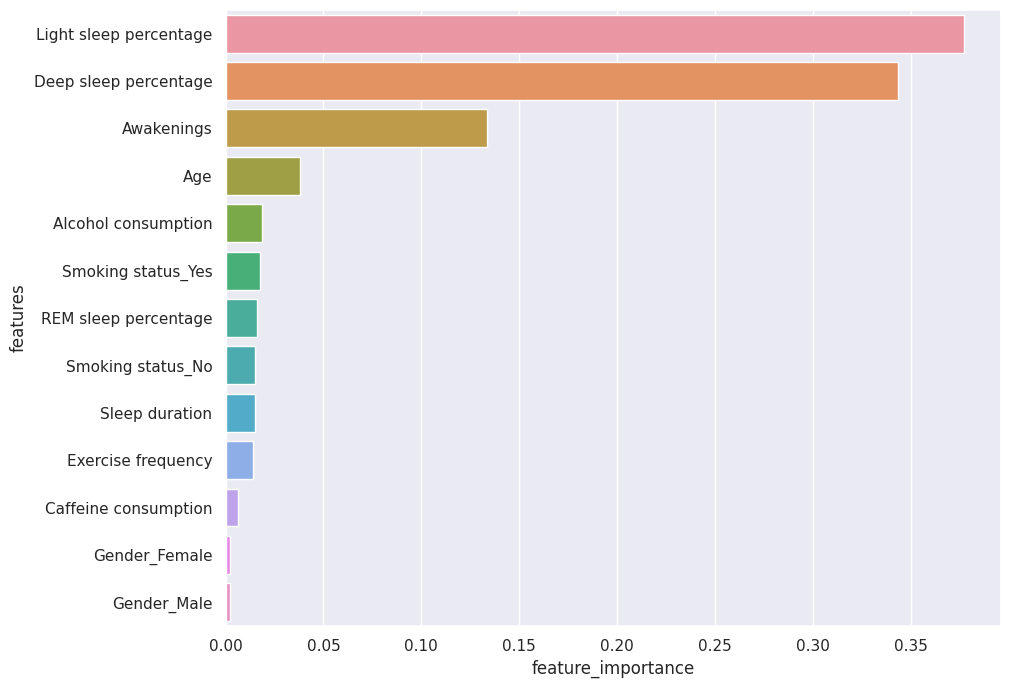

In [81]:
plot_importance(X2_train.columns, rf_model_final.feature_importances_)

## Conclusion
### *After model evaluation, we get an R-squared score of 88.9%. <br>This tells us that the variance of the data from the mean of Sleep efficiency is reduced by 88.9% and with a Root Mean-squared error of 0.047, it shows that the predictions are very close to the actual values in the test set that was sampled for evaluation.*

### Save model

In [82]:
import joblib

In [83]:
# Save the model as a pickle in a file
joblib.dump(rf_model_final, 'sleep_efficiency_model.pkl')

['sleep_efficiency_model.pkl']